In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.shape

(15936, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [6]:
df['Class'].value_counts()

,count
Class,
0.0,15862
1.0,73


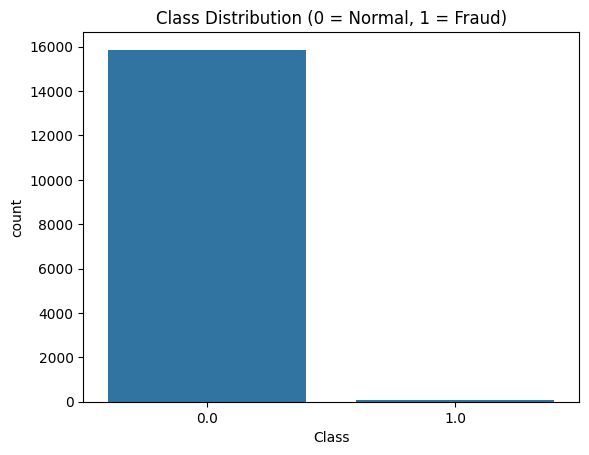

In [7]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

In [8]:
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

df = df.drop(['Amount', 'Time'], axis=1)

In [10]:
df['Class'].isna().sum()

np.int64(1)

In [11]:
df = df.dropna(subset=['Class'])

In [12]:
df['Class'].isna().sum()

np.int64(0)

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [15]:
assert y.isna().sum() == 0, "Target variable contains NaN values!"

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))

[[4759    0]
 [   7   15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4759
         1.0       1.00      0.68      0.81        22

    accuracy                           1.00      4781
   macro avg       1.00      0.84      0.91      4781
weighted avg       1.00      1.00      1.00      4781

ROC AUC: 0.8409090909090908


In [18]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))

[[4759    0]
 [   5   17]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4759
         1.0       1.00      0.77      0.87        22

    accuracy                           1.00      4781
   macro avg       1.00      0.89      0.94      4781
weighted avg       1.00      1.00      1.00      4781

ROC AUC: 0.8863636363636364


In [20]:
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_balanced.fit(X_train, y_train)

y_pred_bal = lr_balanced.predict(X_test)

print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4759
         1.0       0.32      0.86      0.46        22

    accuracy                           0.99      4781
   macro avg       0.66      0.93      0.73      4781
weighted avg       1.00      0.99      0.99      4781



In [21]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.001, random_state=42)
df['anomaly'] = iso.fit_predict(X)

df['anomaly'] = df['anomaly'].map({1:0, -1:1})

In [22]:
print(confusion_matrix(y, df['anomaly']))

[[15861     1]
 [   59    14]]


In [23]:
def predict_transaction(transaction):
    transaction = scaler.transform([transaction])
    return lr_balanced.predict(transaction)

This function can be integrated into a live transaction pipeline.